In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

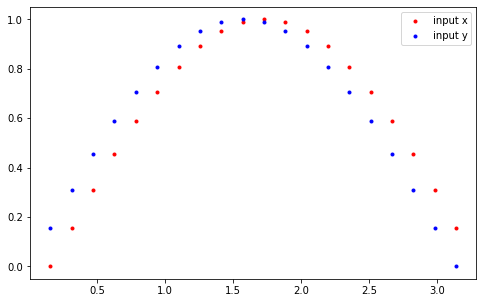

In [4]:
plt.figure(figsize=(8,5))
seq_length = 20
# generate evenly spaced data points
time_steps = np.linspace(0, np.pi, seq_length+1)
data = np.sin(time_steps)
# 1 is the input size
data.resize((seq_length+1, 1))

x = data[:-1] # all but last piece of data
y = data[1:] # all but first piece of data

plt.plot(time_steps[1:], x, 'r.', label='input x')
plt.plot(time_steps[1:], y, 'b.', label='input y')

plt.legend(loc='best')
plt.show()

In [5]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_dim, n_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, hidden_dim)
        output = self.fc(r_out)
        return output, hidden

In [6]:
# deciding hyperparameters
input_size = 1
hidden_dim = 32
output_size =1
n_layers = 1

rnn = RNN(input_size, hidden_dim, n_layers, output_size)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [7]:
# MSE loss and Adam Optimizer (Standard for RNNs)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [8]:
def train(rnn, n_steps, print_every):
    hidden = None
    for batch_i, step in enumerate(range(n_steps)):
        time_steps = np.linspace(step*np.pi, (step+1)*np.pi, seq_length+1)
        data= np.sin(time_steps)
        data.resize((seq_length+1, 1))
        x = data[:-1]
        y = data[1:]
        
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y) 
        
        prediction, hidden = rnn(x_tensor, hidden)
        hidden = hidden.data
        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
         # display loss and predictions
        if batch_i%print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()
            
        return rnn

Loss:  0.1633877456188202


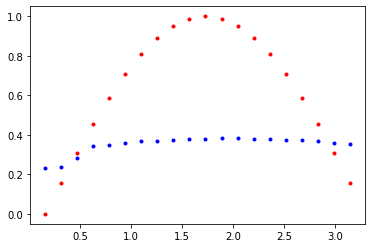

In [10]:
n_steps = 75
print_every = 15
trained_rnn = train(rnn, n_steps, print_every)